In [1]:
import pandas as pd

df = pd.read_csv('../data/cleaned_data.csv')
col = list(df.columns[1:5] ) + [df.columns[9]]

df = df[col]

df.head()

,Age group,Gender,Category,Marital status,Customisation Budget
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,under 500
1,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,under 500
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,500-1000
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,under 500
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,over 1000


In [2]:
for c in df.columns:
    print(f"{c}: {df[c].unique()}")

Age group: ['20-30' '51-60' '41-50' '31-40']
Gender: ['Male' 'Female' 'Prefer not to say']
Category: ['Do not own a car, but planning to purchase in future'
 'Own more than one car' 'Own a car']
Marital status: ['Single' 'Married with children' 'Married with no children']
Customisation Budget: ['under 500' '500-1000' 'over 1000' '0']


Age group: ['20-30' '51-60' '41-50' '31-40']
Gender: ['Male' 'Female' 'Prefer not to say']
Category: ['Do not own a car, but planning to purchase in future'
 'Own more than one car' 'Own a car']
Marital status: ['Single' 'Married with children' 'Married with no children']
Customisation Budget: ['Mid Low' 'Mid High' 'High' 'Low']


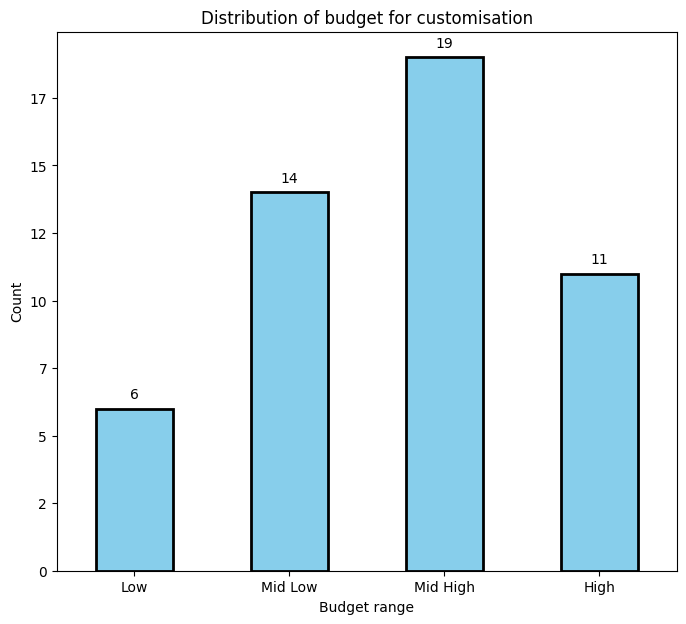

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

label_mapping = {'0': 'Low',
                'under 500': 'Mid Low',
                '500-1000': 'Mid High',
                'over 1000': 'High'}

df['Customisation Budget'] = df['Customisation Budget'].map(label_mapping)

for c in df.columns:
    print(f"{c}: {df[c].unique()}")

plt.figure(figsize=(8, 7))  

order = ['Low', 'Mid Low', 'Mid High', 'High']

ax = df['Customisation Budget'].value_counts().sort_index().loc[order].plot(kind='bar', color='skyblue', edgecolor='black', linewidth=2)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribution of budget for customisation')
plt.xticks(rotation=0)
plt.xlabel('Budget range')
plt.ylabel('Count')
plt.show()

In [4]:
df.head()


,Age group,Gender,Category,Marital status,Customisation Budget
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Mid Low
1,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Mid Low
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Mid High
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Mid Low
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,High


### **RANDOM FOREST EXPERIMENT**

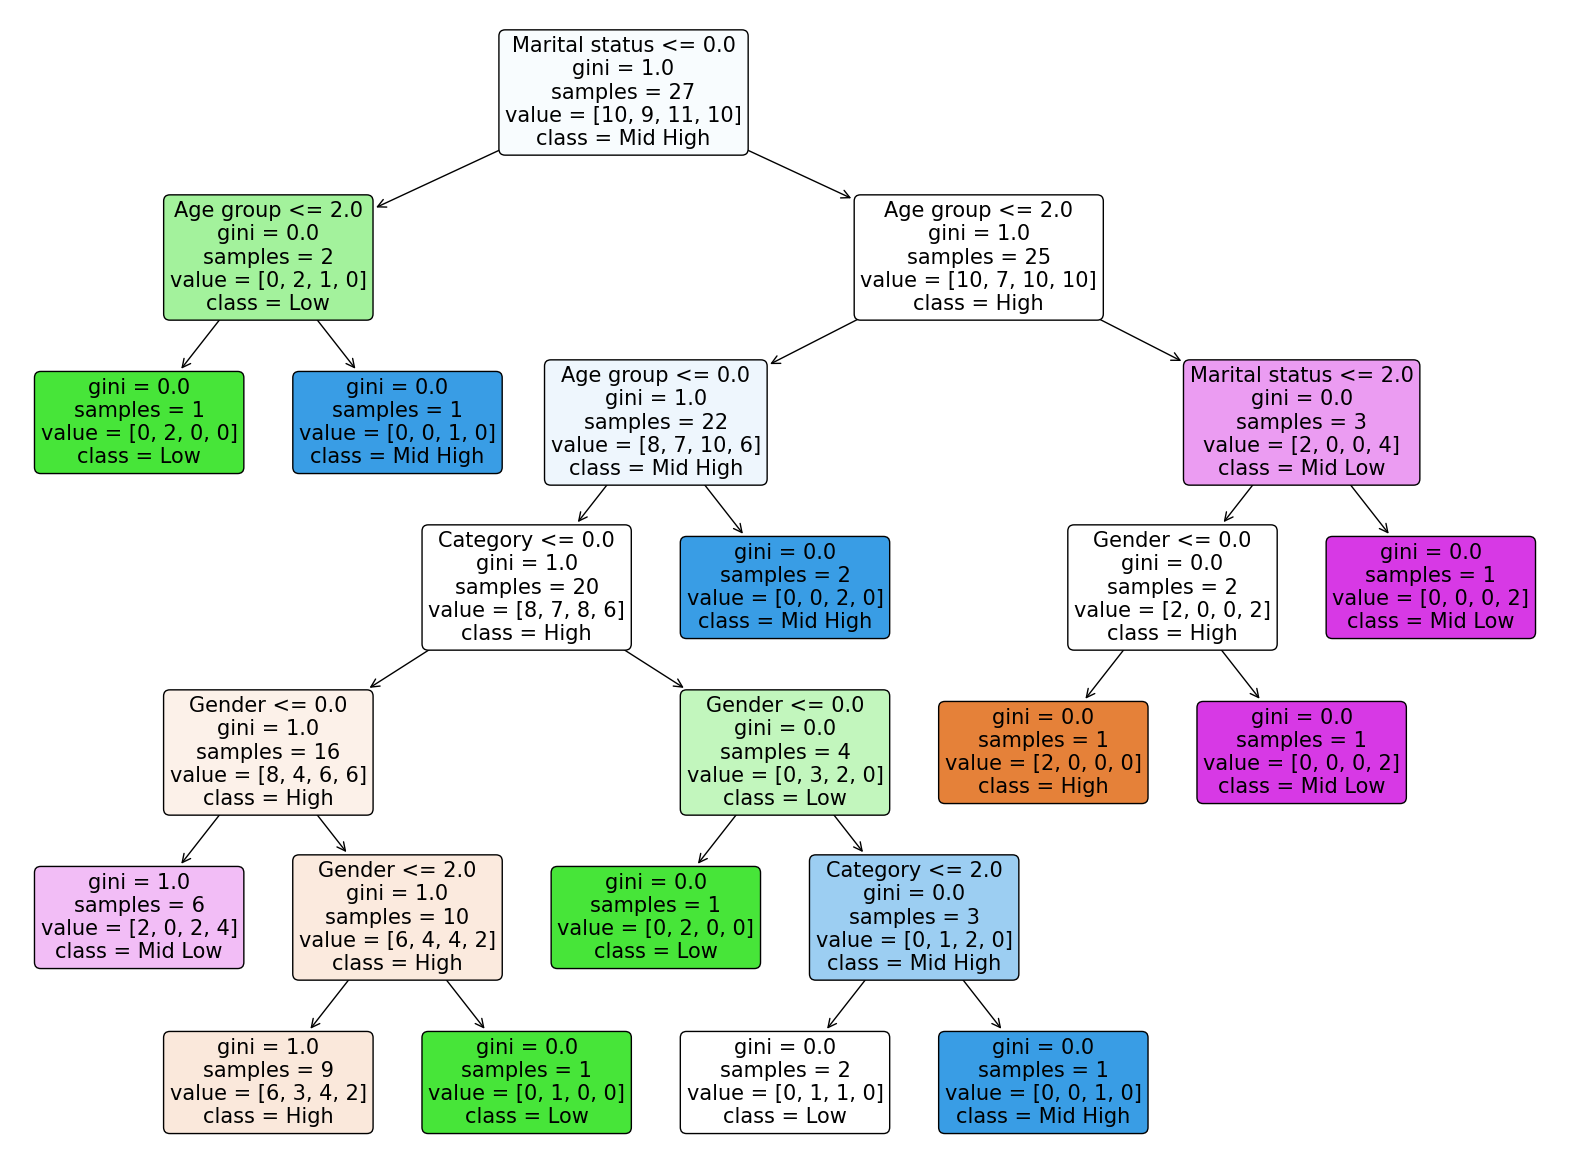

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

label_encoder = LabelEncoder()
df_encoded = df.copy()
categorical_columns = ['Age group', 'Gender', 'Category', 'Marital status', 'Customisation Budget']

for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])

X = df_encoded[categorical_columns[:-1]]  # Exclude 'Customisation Budget' from features
y = df['Customisation Budget']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


plt.figure(figsize=(20, 15))
plot_tree(rf_model.estimators_[0], feature_names=categorical_columns[:-1], class_names=label_encoder.classes_, filled=True, rounded=True, label='all', precision=0, fontsize=15)
plt.show()


In [6]:
label_mapping = {}
for col in categorical_columns:
    original_labels = df[col].unique()
    encoded_labels = label_encoder.fit_transform(original_labels)
    label_mapping[col] = dict(zip(original_labels, encoded_labels))
    df_encoded[col] = df[col].map(label_mapping[col])

# Print the pairs of original and encoded labels
for col in categorical_columns:
    original_labels = df[col].unique()
    encoded_labels = label_encoder.fit_transform(original_labels)

    print(f"\nMapping for {col}:")
    for original, encoded in zip(original_labels, encoded_labels):
        print(f"{original} -> {encoded}")


Mapping for Age group:
20-30 -> 0
51-60 -> 3
41-50 -> 2
31-40 -> 1

Mapping for Gender:
Male -> 1
Female -> 0
Prefer not to say -> 2

Mapping for Category:
Do not own a car, but planning to purchase in future -> 0
Own more than one car -> 2
Own a car -> 1

Mapping for Marital status:
Single -> 2
Married with children -> 0
Married with no children -> 1

Mapping for Customisation Budget:
Mid Low -> 3
Mid High -> 2
High -> 0
Low -> 1


## **Customisation Budget vs Total parts to customise**

In [7]:
import pandas as pd

df = pd.read_csv('../data/cleaned_data.csv')
df['Total parts to customise'] = df.apply(lambda row: len(row['Exterior components to customise'].split(';')) + len(row['Interior components to customise'].split(';')), axis=1)
col = [df.columns[-9]] + [df.columns[-1]] 

df = df[col]

label_mapping = {'0': 'Low',
                'under 500': 'Mid Low',
                '500-1000': 'Mid High',
                'over 1000': 'High'}

df['Customisation Budget'] = df['Customisation Budget'].map(label_mapping)

df.head()

,Customisation Budget,Total parts to customise
0,Mid Low,2
1,Mid Low,5
2,Mid High,6
3,Mid Low,9
4,High,6


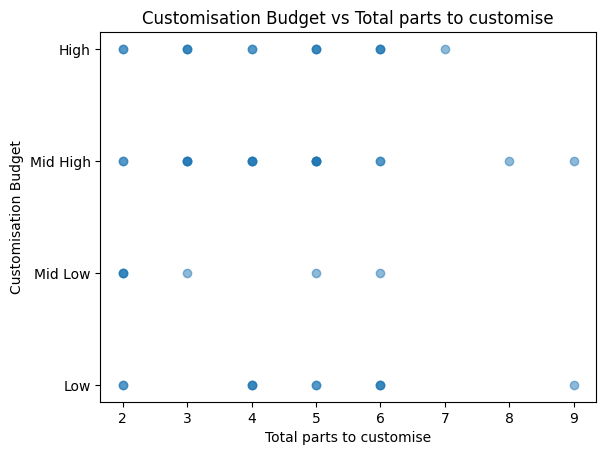

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

label_mapping = {'0': 'Low',
                'under 500': 'Mid Low',
                '500-1000': 'Mid High',
                'over 1000': 'High'}

X = df[['Total parts to customise']]  
y = df['Customisation Budget'].map(label_mapping)  

df_sorted = df.sort_values(by='Customisation Budget')

plt.scatter(X, df_sorted['Customisation Budget'], alpha=0.5)
plt.title('Customisation Budget vs Total parts to customise')
plt.xlabel('Total parts to customise')
plt.ylabel('Customisation Budget')

plt.yticks(range(len(label_mapping)), label_mapping.values())

plt.show()
